
<div style="text-align: center">

# <h1>**<font color="#004FBF" size=7>Car Price Prediction</font>**</h1>
<br><br>

<div style="text-align: right">

**<font color="#004D9F" size=4>[Ael-Dev]</font><br>**

<a id="section1"></a>
## **<font color="#004F9F"> 1. Business Understanding</font>**
---


### <font color="#004F9F"> Problem Statement</font>


The goal of this machine learning project is to develop a predictive model that can accurately predict whether a used car has been sold or not based on the provided dataset's features. 

By analyzing the various attributes of the used cars, the model aims to identify patterns and relationships that can help in predicting the likelihood of a car being sold.


### <font color="#004F9F"> Plan of Action</font>

Data Collection and Preprocessing
- Gather a dataset with car attributes such as make, model, year, mileage, fuel type, transmission type, and price.

Exploratory Data Analysis (EDA)
- Analyze the dataset to understand feature distributions and discover patterns or anomalies.
- Use visualizations to identify trends and relationships between variables.

Data Preparation
- Clean the data by addressing missing values, normalizing numerical features, and encoding categorical variables.

Model Building & Training
- Construct and train predictive models like linear regression, random forest, or gradient boosting.
- Optimize model parameters and select relevant features to improve prediction accuracy.

Evaluation Metrics
- Evaluate model performance using metrics such as RMSE (Root Mean Squared Error) and MAE (Mean Absolute Error).
- Determine the best-performing model based on evaluation results.

Deployment
- Implement the model in a production environment to provide real-time price predictions.
- Ensure the deployment setup allows for easy updates and maintenance.


### <font color="#004F9F"> About Dataset</font>

[Source: Kaggle](https://www.kaggle.com/datasets/shubham1kumar/usedcar-data?resource=download&select=UserCarData.csv)

Based on various market surveys, the consulting firm has gathered a large dataset of different types of used cars across the market.

Data Dictionary:

- Sales_ID (Sales ID)
- name (Name of the used car)
- year (Year of the car purchase)
- selling_price (Current selling price for used car)
- km_driven (Total km driven)
- Region (Region where it is used)
- State or Province (State or Province where it is used)
- City (City where it is used)
- fuel (Fuel type)
- seller_type (Who is selling the car)
- transmission (Transmission type of the car)
- owner (Owner type)
- mileage (Mileage of the car)
- engine (engine power)
- max_power (max power)
- seats (Number of seats)
- sold (used car sold or not)

<a id="section2"></a>
## **<font color="#004F9F"> 2. Data Collection</font>**
---

### <font color="#004F9F">Load Dataset</font>

In [28]:
import pandas as pd

df_raw = pd.read_csv("./UserCarData.csv", sep=',')
df_raw.head()

,Sales_ID,name,year,selling_price,km_driven,Region,State or Province,City,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,sold
0,1,Maruti,2014,450000,145500,East,District of Columbia,Washington,Diesel,Individual,Manual,First_Owner,23.40,1248,74.00,190Nm@ 2000rpm,5,Y
1,2,Skoda,2014,370000,120000,East,New York,New York City,Diesel,Individual,Manual,Second_Owner,21.14,1498,103.52,250Nm@ 1500-2500rpm,5,Y
2,3,Honda,2006,158000,140000,Central,Illinois,Chicago,Petrol,Individual,Manual,Third_Owner,17.70,1497,78.00,"12.7@ 2,700(kgm@ rpm)",5,Y
3,4,Hyundai,2010,225000,127000,Central,Illinois,Chicago,Diesel,Individual,Manual,First_Owner,23.00,1396,90.00,22.4 kgm at 1750-2750rpm,5,Y
4,5,Maruti,2007,130000,120000,East,New York,New York City,Petrol,Individual,Manual,First_Owner,16.10,1298,88.20,"11.5@ 4,500(kgm@ rpm)",5,Y


### <font color="#004F9F">Overview Information</font>

In [29]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7906 entries, 0 to 7905
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Sales_ID           7906 non-null   int64  
 1   name               7906 non-null   object 
 2   year               7906 non-null   int64  
 3   selling_price      7906 non-null   int64  
 4   km_driven          7906 non-null   int64  
 5   Region             7906 non-null   object 
 6   State or Province  7906 non-null   object 
 7   City               7906 non-null   object 
 8   fuel               7906 non-null   object 
 9   seller_type        7906 non-null   object 
 10  transmission       7906 non-null   object 
 11  owner              7906 non-null   object 
 12  mileage            7906 non-null   float64
 13  engine             7906 non-null   int64  
 14  max_power          7906 non-null   float64
 15  torque             7906 non-null   object 
 16  seats              7906 

In [30]:
# descriptive statistics
df_raw.describe().T

,count,mean,std,min,25%,50%,75%,max
Sales_ID,7906.0,4070.106248,2345.770159,1.0,2037.25,4076.5,6102.00,8128.0
year,7906.0,2013.983936,3.863695,1994.0,2012.00,2015.0,2017.00,2020.0
selling_price,7906.0,649813.720845,813582.748354,29999.0,270000.00,450000.0,690000.00,10000000.0
km_driven,7906.0,69188.659752,56792.296343,1.0,35000.00,60000.0,95425.00,2360457.0
mileage,7906.0,19.419861,4.036263,0.0,16.78,19.3,22.32,42.0
engine,7906.0,1458.708829,503.893057,624.0,1197.00,1248.0,1582.00,3604.0
max_power,7906.0,91.587374,35.747216,32.8,68.05,82.0,102.00,400.0
seats,7906.0,5.416393,0.959208,2.0,5.00,5.0,5.00,14.0


In [31]:
df_raw.describe(include=object).T

,count,unique,top,freq
name,7906,31,Maruti,2367
Region,7906,4,Central,2376
State or Province,7906,49,California,901
City,7906,1310,New York City,196
fuel,7906,4,Diesel,4299
seller_type,7906,3,Individual,6563
transmission,7906,2,Manual,6865
owner,7906,5,First_Owner,5215
torque,7906,441,190Nm@ 2000rpm,530
sold,7906,2,N,5906


In [32]:
# more information
from funpymodeling.exploratory import status

status(df_raw)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,Sales_ID,0,0.0,0,0.00000,7906,int64
1,name,0,0.0,0,0.00000,31,object
2,year,0,0.0,0,0.00000,27,int64
3,selling_price,0,0.0,0,0.00000,670,int64
4,km_driven,0,0.0,0,0.00000,898,int64
5,Region,0,0.0,0,0.00000,4,object
6,State or Province,0,0.0,0,0.00000,49,object
7,City,0,0.0,0,0.00000,1310,object
8,fuel,0,0.0,0,0.00000,4,object
9,seller_type,0,0.0,0,0.00000,3,object


<a id="section3"></a>
## **<font color="#004F9F"> 3. Exploratory Data Analysis (EDA)</font>**
---


<a id="section3"></a>
## **<font color="#004F9F"> 4. Data Preparation</font>**
---

### <font color="#004F9F">Delete Unnecesary Columns</font>

In [33]:

filter_data = df_raw.drop(['Sales_ID', 'name', 'State or Province', 'City','torque'], axis=1)
filter_data.head()

,year,selling_price,km_driven,Region,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,sold
0,2014,450000,145500,East,Diesel,Individual,Manual,First_Owner,23.40,1248,74.00,5,Y
1,2014,370000,120000,East,Diesel,Individual,Manual,Second_Owner,21.14,1498,103.52,5,Y
2,2006,158000,140000,Central,Petrol,Individual,Manual,Third_Owner,17.70,1497,78.00,5,Y
3,2010,225000,127000,Central,Diesel,Individual,Manual,First_Owner,23.00,1396,90.00,5,Y
4,2007,130000,120000,East,Petrol,Individual,Manual,First_Owner,16.10,1298,88.20,5,Y


### <font color="#004F9F">Change Categorical Values to Numeric</font>

In [34]:
# manual
categories_map = {'Individual': 0, 'Dealer': 1, 'Trustmark_Dealer':2}
filter_data['seller_type'] = filter_data['seller_type'].map(categories_map)

categories_map = {'N':0, 'Y':1}
filter_data['sold'] = filter_data['sold'].map(categories_map)

filter_data.sample(5)

,year,selling_price,km_driven,Region,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,sold
117,2017,850000,76139,East,Diesel,0,Manual,First_Owner,23.00,1498,98.96,5,1
225,2013,300000,120000,Central,Diesel,0,Manual,Second_Owner,17.21,1493,100.00,7,1
5358,2017,750000,43000,Central,Diesel,1,Manual,First_Owner,22.54,1396,88.73,5,0
5382,2011,275000,125000,Central,Diesel,0,Manual,Fourth_Above_Owner,20.54,1598,103.60,5,0
1601,2017,325000,120000,East,Diesel,0,Manual,First_Owner,27.28,1047,69.00,5,1


### <font color="#004F9F">Select variables for our UI (MVP)</font>

In [45]:
filter_data2 = filter_data[['year', 'fuel', 'seats','transmission','Region','selling_price']].copy()
filter_data2.sample(5)

,year,fuel,seats,transmission,Region,selling_price
7566,2013,Diesel,5,Manual,East,380000
2627,2015,Petrol,5,Manual,South,480000
4277,2011,Petrol,5,Manual,Central,215000
7762,2018,Petrol,5,Manual,West,300000
6441,2012,Diesel,8,Manual,East,750000


### <font color="#004F9F">Categorical values to Numeric</font>

In [41]:
# Get dummies
df_binary = pd.get_dummies(filter_data2)

df_binary.sample(5)

,year,seats,selling_price,fuel_CNG,fuel_Diesel,fuel_LPG,fuel_Petrol,transmission_Automatic,transmission_Manual,Region_Central,Region_East,Region_South,Region_West
5827,2014,5,240000,False,False,False,True,False,True,True,False,False,False
5246,2017,5,375000,False,False,False,True,True,False,False,True,False,False
5354,2015,5,550000,False,True,False,False,False,True,False,False,False,True
67,2018,5,448000,False,False,False,True,True,False,False,True,False,False
2377,2006,5,110000,False,False,False,True,False,True,True,False,False,False


In [50]:
from sklearn.preprocessing import OneHotEncoder

# Crear una instancia de OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)#, drop='first')

# Seleccionar las columnas categóricas para la codificación
categorical_columns = ['fuel', 'transmission', 'Region']
encoded_columns = encoder.fit_transform(filter_data2[categorical_columns])

# Crear un DataFrame con las columnas codificadas
encoded_columns_df = pd.DataFrame(encoded_columns, columns=encoder.get_feature_names_out(categorical_columns)).astype('uint8')

# Concatenar las columnas codificadas con el DataFrame original
df_encoded = pd.concat([filter_data2.drop(categorical_columns, axis=1), encoded_columns_df], axis=1)

df_encoded.head(5)

,year,seats,selling_price,fuel_CNG,fuel_Diesel,fuel_LPG,fuel_Petrol,transmission_Automatic,transmission_Manual,Region_Central,Region_East,Region_South,Region_West
0,2014,5,450000,0,1,0,0,0,1,0,1,0,0
1,2014,5,370000,0,1,0,0,0,1,0,1,0,0
2,2006,5,158000,0,0,0,1,0,1,1,0,0,0
3,2010,5,225000,0,1,0,0,0,1,1,0,0,0
4,2007,5,130000,0,0,0,1,0,1,0,1,0,0


In [51]:
status(df_encoded)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,year,0,0.0,0,0.000000,27,int64
1,seats,0,0.0,0,0.000000,9,int64
2,selling_price,0,0.0,0,0.000000,670,int64
3,fuel_CNG,0,0.0,7854,0.993423,2,uint8
4,fuel_Diesel,0,0.0,3607,0.456236,2,uint8
5,fuel_LPG,0,0.0,7871,0.995573,2,uint8
6,fuel_Petrol,0,0.0,4386,0.554769,2,uint8
7,transmission_Automatic,0,0.0,6865,0.868328,2,uint8
8,transmission_Manual,0,0.0,1041,0.131672,2,uint8
9,Region_Central,0,0.0,5530,0.699469,2,uint8


### <font color="#004F9F">Split in input and output (X / Y)</font>

In [52]:
X = df_encoded.drop('selling_price',  axis=1)
y = df_encoded['selling_price']

### <font color="#004F9F">Split in training and test data</font>

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test,  y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
print("Train shape: ", X_train.shape,"Test Shape: ", X_test.shape)


Train shape:  (6324, 12) Test Shape:  (1582, 12)


<a id="section4"></a>
## **<font color="#004F9F"> 4. Model Building & Training</font>**
---

### <font color="#004F9F">Model Selection</font>

In [56]:
# select model
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

model_rf = RandomForestRegressor()

### <font color="#004F9F">Fine Tuning</font>

In [57]:
params = {
    'n_estimators': [5000],
    # 'max_features': [50, 100],
    # 'boostrap': ['True', 'False'],
    # 'max_deep':[50,500],
    # 'min_samples_leaf':[3,50],
    # 'min_samples_split':[10,50]
}

grid_rf = GridSearchCV(
    estimator=model_rf,
    param_grid=params,
    scoring='neg_mean_absolute_error',
    cv=2,
    verbose=1
)

### <font color="#004F9F">Fit</font>

In [58]:
grid_rf.fit(X_train, y_train)

Fitting 2 folds for each of 1 candidates, totalling 2 fits


GridSearchCV(cv=2, estimator=RandomForestRegressor(),
             param_grid={'n_estimators': [5000]},
             scoring='neg_mean_absolute_error', verbose=1)

In [59]:
# obtain best estimator
grid_rf.best_estimator_

RandomForestRegressor(n_estimators=5000)

### <font color="#004F9F">Predictions</font>

In [60]:
grid_rf.predict(X_train)
grid_rf.predict(X_test)

array([ 462524.13293782,  540615.53677263,  319967.31198472, ...,
        268411.66875988, 2502948.14185811,  805211.62768369])

<a id="section5"></a>
## **<font color="#004F9F"> 5. Evaluation Metrics</font>**
---

### <font color="#004F9F">Visualization</font>

- Linea gris entrecortada: deseado
- Linea negra entrecortada: predecido

c:\Users\Alex\miniconda3\envs\venv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


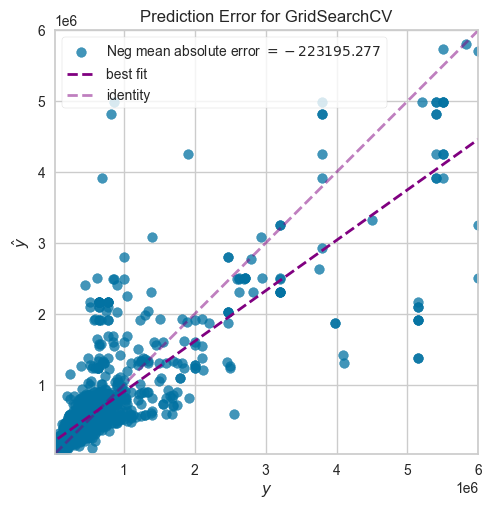

<Axes: title={'center': 'Prediction Error for GridSearchCV'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [65]:
from yellowbrick.regressor import PredictionError

vis_red_err = PredictionError(grid_rf, line_color='purple')

vis_red_err.fit(X_train,y_train)
vis_red_err.score(X_test,y_test)
vis_red_err.show()

<a id="section6"></a>
## **<font color="#004F9F"> 6. Save Artifacts</font>**
---

In [68]:
# save and load stucture or transformations

import pickle
import os

# Specify the directory where you want to save the model
directory = '../artifacts'
categories_ohe = 'categories_ohe.pkl'
full_path = os.path.join(directory, categories_ohe)

# columns
list_cat_ohe = X_train.columns

# Ensure the directory exists
if not os.path.exists(directory):
    os.makedirs(directory)

# Save the model to the specified directory with exception handling
try:
    with open(full_path, "wb") as handle:
        pickle.dump(list_cat_ohe, handle, protocol=pickle.HIGHEST_PROTOCOL)
except Exception as e:
    print(f"Error saving the columns: {e}")

# Load the model from the specified directory with exception handling
try:
    with open(full_path, "rb") as handle:
        loaded_categories_ohe = pickle.load(handle)
except Exception as e:
    print(f"Error loading the model: {e}")


In [67]:
# save and load the model

import pickle
import os

# Specify the directory where you want to save the model
directory = '../artifacts'
model_name = 'model.pkl'
full_path = os.path.join(directory, model_name)

# Ensure the directory exists
if not os.path.exists(directory):
    os.makedirs(directory)

# Save the model to the specified directory with exception handling
try:
    with open(full_path, "wb") as file:
        pickle.dump(grid_rf, file)
except Exception as e:
    print(f"Error saving the model: {e}")

# Load the model from the specified directory with exception handling
try:
    with open(full_path, "rb") as file:
        loaded_model = pickle.load(file)
except Exception as e:
    print(f"Error loading the model: {e}")